# 🔬 CMC Potency Modeling with SHAP

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

## 🧪 Simulate Potency Dataset

In [4]:
np.random.seed(101)
n_samples = 300
df = pd.DataFrame({
    'donor_age': np.random.randint(20, 65, n_samples),
    'passage_number': np.random.randint(1, 5, n_samples),
    'MOI': np.random.uniform(2, 10, n_samples),
    'culture_days': np.random.randint(7, 15, n_samples),
    'transduction_efficiency': np.random.uniform(30, 90, n_samples),
    'viability_percent': np.random.uniform(75, 99, n_samples),
    'activation_marker_percent': np.random.uniform(20, 95, n_samples),
    'IL2_expression': np.random.uniform(50, 1200, n_samples),
    'IFNg_expression': np.random.uniform(50, 1400, n_samples)
})
noise = np.random.normal(0, 5, n_samples)
df['potency_percent'] = (
    0.015 * df['IL2_expression'] +
    0.01 * df['IFNg_expression'] +
    0.15 * df['activation_marker_percent'] +
    0.08 * df['transduction_efficiency'] +
    0.08 * df['viability_percent'] -
    6.0 * df['passage_number'] +
    noise
).clip(20, 100)
df.head()

,donor_age,passage_number,MOI,culture_days,transduction_efficiency,viability_percent,activation_marker_percent,IL2_expression,IFNg_expression,potency_percent
0,51,1,3.685338,8,81.205262,83.040181,33.783699,776.918892,1319.612993,39.853700
1,31,3,4.668357,14,33.228166,94.026373,75.410811,1153.495862,1100.182279,31.134611
2,37,4,2.251541,12,35.709975,98.277591,79.478721,373.865125,378.406647,20.000000
3,26,2,6.419988,13,38.733939,89.611329,67.929480,1013.141749,486.168602,32.805991
4,43,4,3.310331,8,80.758140,94.807317,64.192815,637.271232,455.665327,20.000000


## 🤖 Train Random Forest Model

In [6]:
X = df.drop(columns=['potency_percent'])
y = df['potency_percent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae, r2

(2.0789889115877944, 0.7116031681367817)

## 📈 Actual vs Predicted

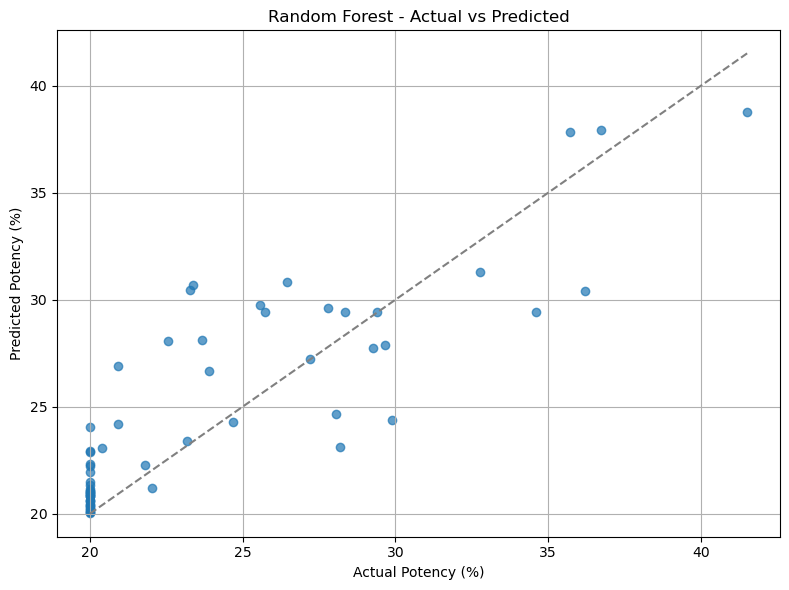

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel('Actual Potency (%)')
plt.ylabel('Predicted Potency (%)')
plt.title('Random Forest - Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔍 SHAP Summary

In [ ]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)